In [1]:
!pip install matplotlib
!pip install pandas
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt

    100% |████████████████████████████████| 12.6MB 42kB/s  eta 0:00:01
    100% |████████████████████████████████| 13.9MB 38kB/s  eta 0:00:01  1% |▋                               | 266kB 31.5MB/s eta 0:00:01 eta 0:00:01
    100% |████████████████████████████████| 61kB 4.0MB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 1.2MB/s eta 0:00:01
    100% |████████████████████████████████| 952kB 600kB/s eta 0:00:01
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 8.9MB 62kB/s  eta 0:00:01    58% |██████████████████▉             | 5.2MB 26.4MB/s eta 0:00:01
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Working on Series

In [2]:
object = Series([51,50,5,2])
print(object)
print(object.values)
print(object.index)

0    51
1    50
2     5
3     2
dtype: int64
[51 50  5  2]
RangeIndex(start=0, stop=4, step=1)


Using Numpy Arrays to Series

In [4]:
data_array = np.array(['Tuktuk','Krati','CutiePie'])
s = Series(data_array)
print(s)

#custom indexing
s = Series(data_array,index=[100,101,102])
print(s)

0      Tuktuk
1       Krati
2    CutiePie
dtype: object
100      Tuktuk
101       Krati
102    CutiePie
dtype: object


In [6]:
#using real life ex
revenue = Series([20,80,40,35],
index=['ola','uber','grab','gojek'])
print(revenue)
print(revenue['ola'])
print(revenue[revenue>=35])

ola      20
uber     80
grab     40
gojek    35
dtype: int64
20
uber     80
grab     40
gojek    35
dtype: int64


In [7]:
#use boolean conditions
print('lyft' in revenue)

#nan values
index_2 = ['ola','uber','grab','gojek','lyft']
revenue2 = Series(revenue,index_2)
print(revenue2)

#addition of series (+)
print(revenue+revenue2)

False
ola      20.0
uber     80.0
grab     40.0
gojek    35.0
lyft      NaN
dtype: float64
gojek     70.0
grab      80.0
lyft       NaN
ola       40.0
uber     160.0
dtype: float64


In [8]:
#isnull and notnull
#print("Checking is series contains any null values :\n"+str(pd.isnull(revenue2)))
print(pd.notnull(revenue2))

ola       True
uber      True
grab      True
gojek     True
lyft     False
dtype: bool


In [10]:
#assigning names
revenue2.name="Company Revenues"
revenue2.index.name="Company Name"
print(revenue2)

revenue_dict = revenue.to_dict()
print(revenue_dict)

Company Name
ola      20.0
uber     80.0
grab     40.0
gojek    35.0
lyft      NaN
Name: Company Revenues, dtype: float64
{'ola': 20, 'uber': 80, 'grab': 40, 'gojek': 35}


DataFrames for read from clipboard

In [ ]:
#example - Revenue of companies
revenue_df = pd.read_clipboard()
print(revenue_df)
print revenue_df.columns
print revenue_df['Rank ']
revenue_df2 = DataFrame(revenue_df,columns=['Rank ','Name ','Industry ','Profit'])
print revenue_df2

#head and tail
print revenue_df.head(2)
print revenue_df.tail(2)

#access rows in df
print revenue_df.ix[0] #row 1
print revenue_df.ix[5] #row 6

array1 = np.array([1,2,3,4,5,6])
revenue_df2['Profit'] = array1
print revenue_df2

#series
profits = Series([900,1000],index=[3,5])
revenue_df2['Profit'] = profits
print revenue_df2

del revenue_df2['Profit']
print revenue_df2

Dictonary function to Dataframe 

In [12]:
#dictionary function to dataframe
sample = {
     'Name':['Vijender Singh','Guddu'],
     'Salary':['Rs.1200000','Rs.246000']
}
#
print(sample)
#
sample_df = DataFrame(sample)
print(sample_df)

{'Name': ['Vijender Singh', 'Guddu'], 'Salary': ['Rs.1200000', 'Rs.246000']}
             Name      Salary
0  Vijender Singh  Rs.1200000
1           Guddu   Rs.246000


Index-Objects

In [13]:
series1 = Series([101,201,301,401],index=['a1','b1','c1','d1'])

index1 = series1.index
print(index1)

print(index1[2:])

#negative indexes
print(index1[-2:])
print(index1[:-2])

print(index1[2:4])

#interesting
#index1[0] = 'e' #TypeError: Index does not support mutable operations

Index(['a1', 'b1', 'c1', 'd1'], dtype='object')
Index(['c1', 'd1'], dtype='object')
Index(['c1', 'd1'], dtype='object')
Index(['a1', 'b1'], dtype='object')
Index(['c1', 'd1'], dtype='object')


Reindexing in pandas

In [16]:
#create new series series1
cricketers = Series(['Sachin','Kohli','Sehwag'],index=[1,2,3])
print(cricketers)

#creating new indexes using reindex
cricketers = cricketers.reindex([1,2,3,4])
print(cricketers)


1    Sachin
2     Kohli
3    Sehwag
dtype: object
1    Sachin
2     Kohli
3    Sehwag
4       NaN
dtype: object


In [18]:
#using fillvalue
cricketers = cricketers.reindex([1,2,3,4,5],fill_value='Dhoni')
print(cricketers)

ranger = range(8)
print(ranger)

#forward fill
cricketers = cricketers.reindex(ranger,method="ffill") 
print(cricketers)

1    Sachin
2     Kohli
3    Sehwag
4       NaN
5     Dhoni
dtype: object
range(0, 8)
0       NaN
1    Sachin
2     Kohli
3    Sehwag
4       NaN
5     Dhoni
6     Dhoni
7     Dhoni
dtype: object


In [26]:
#create new dataframe using randn
df_1 = DataFrame((abs(randn(9))*100).reshape(3,3),
                 index=['a','b','c'],
                 columns=['c1','c2','c3'])
print(df_1)

#reindex rows of dataframe
df_2 = df_1.reindex(['a','b','c','d'])
print(df_2)

# #reindex columns of dataframe
df_3 = df_2.reindex(columns=['c1','c2','c3','c4'])
print(df_3)

# #using .ix[] to reindex
df_4 = df_1.ix[['a','b','c','d','e'],['c1','c2','c3','c4','c5']]
print(df_4)

           c1          c2          c3
a    3.245230   40.515879    5.962972
b  117.484450  183.517995   23.278468
c   94.871352  166.665619  122.659599
           c1          c2          c3
a    3.245230   40.515879    5.962972
b  117.484450  183.517995   23.278468
c   94.871352  166.665619  122.659599
d         NaN         NaN         NaN
           c1          c2          c3  c4
a    3.245230   40.515879    5.962972 NaN
b  117.484450  183.517995   23.278468 NaN
c   94.871352  166.665619  122.659599 NaN
d         NaN         NaN         NaN NaN
           c1          c2          c3  c4  c5
a    3.245230   40.515879    5.962972 NaN NaN
b  117.484450  183.517995   23.278468 NaN NaN
c   94.871352  166.665619  122.659599 NaN NaN
d         NaN         NaN         NaN NaN NaN
e         NaN         NaN         NaN NaN NaN


/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  app.launch_new_instance()


In [ ]:
Drop Entries

In [33]:
cricketers = Series(['Smith','Kholi','Root'],index=[1,2,3])
cricketers = cricketers.drop(1)
print(cricketers)

#dataframes
cricketers_df = DataFrame(np.arange(9).reshape(3,3),
                          index=['Smith','Kholi','Root'],
                          columns=['t20','odi','test'])
print(cricketers_df)

cricketers_df = cricketers_df.drop('Smith',axis=0)
print(cricketers_df)

cricketers_df = cricketers_df.drop('test',axis=1)
print(cricketers_df)

2    Kholi
3     Root
dtype: object
       t20  odi  test
Smith    0    1     2
Kholi    3    4     5
Root     6    7     8
       t20  odi  test
Kholi    3    4     5
Root     6    7     8
       t20  odi
Kholi    3    4
Root     6    7


Handling Null Data in Series

In [34]:
series1 = Series(['A','B','C','D',np.nan])
print(series1)

#validate
print(series1.isnull())
print(series1.dropna())

0      A
1      B
2      C
3      D
4    NaN
dtype: object
0    False
1    False
2    False
3    False
4     True
dtype: bool
0    A
1    B
2    C
3    D
dtype: object


Handling Null Data in DataFrame

In [38]:
df1 = DataFrame([[11,22,33],[55,66,np.nan],
                 [77,np.nan,110],[np.nan,np.nan,np.nan]])
print("Default DataFrame is \n"+str(df1))

print(df1.dropna())
print(df1.dropna(how='all'))

#column wise drop6,
print(df1.dropna(axis=1))

df2 = DataFrame([[11,22,31,np.nan],[42,45,65,77],
                 [82,93,np.nan,np.nan],[112,np.nan,np.nan,np.nan]])
print(df2)

print(df2.dropna(thresh=3))
print(df2.dropna(thresh=2))

#fillna
print(df2.fillna(0))
print(df2.fillna({0:10,1:20,2:30,3:40}))


Default DataFrame is 
      0     1      2
0  11.0  22.0   33.0
1  55.0  66.0    NaN
2  77.0   NaN  110.0
3   NaN   NaN    NaN
      0     1     2
0  11.0  22.0  33.0
      0     1      2
0  11.0  22.0   33.0
1  55.0  66.0    NaN
2  77.0   NaN  110.0
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]
     0     1     2     3
0   11  22.0  31.0   NaN
1   42  45.0  65.0  77.0
2   82  93.0   NaN   NaN
3  112   NaN   NaN   NaN
    0     1     2     3
0  11  22.0  31.0   NaN
1  42  45.0  65.0  77.0
    0     1     2     3
0  11  22.0  31.0   NaN
1  42  45.0  65.0  77.0
2  82  93.0   NaN   NaN
     0     1     2     3
0   11  22.0  31.0   0.0
1   42  45.0  65.0  77.0
2   82  93.0   0.0   0.0
3  112   0.0   0.0   0.0
     0     1     2     3
0   11  22.0  31.0  40.0
1   42  45.0  65.0  77.0
2   82  93.0  30.0  40.0
3  112  20.0  30.0  40.0


In [ ]:
Selecting Moditying Entires

In [39]:
series1 = Series([10,20,30],index=['A','B','C'])
print(series1)

print(series1['A'])
print(series1[['A','B']])

#number indexes
print(series1[0])
print(series1[0:2])

#conditional indexes
print(series1[series1>150])
print(series1[series1==300])

A    10
B    20
C    30
dtype: int64
10
A    10
B    20
dtype: int64
10
A    10
B    20
dtype: int64
Series([], dtype: int64)
Series([], dtype: int64)


In [2]:
#using df and accesing
df1 = DataFrame(np.arange(9).reshape(3,3),
                index=['t20','odi','test'],
                columns=['Dhoni','Kholi','Sachin'])
print(df1)

print(df1['Dhoni'])
print(df1[['Sachin','Kholi']])

print(df1>5)

#ix function access
print(df1.ix['t20'])
print(df1.ix[1])

      Dhoni  Kholi  Sachin
t20       0      1       2
odi       3      4       5
test      6      7       8
t20     0
odi     3
test    6
Name: Dhoni, dtype: int64
      Sachin  Kholi
t20        2      1
odi        5      4
test       8      7
      Dhoni  Kholi  Sachin
t20   False  False   False
odi   False  False   False
test   True   True    True
Dhoni     0
Kholi     1
Sachin    2
Name: t20, dtype: int64
Dhoni     3
Kholi     4
Sachin    5
Name: odi, dtype: int64


/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [ ]:
Data Alignment

In [3]:
ser_a = Series([10,20,30],index=['a','b','c'])
ser_b = Series([30,40,50,60],index=['a','b','c','d'])

#sum of series
print(ser_a+ser_b)

#dataframe
df1 = DataFrame(np.arange(4).reshape(2,2),
                columns=['a','b'],index=['car','bike'])
print(df1)
df2 = DataFrame(np.arange(9).reshape(3,3),
                columns=['a','b','c'],
                index=['car','bike','cycle'])
print(df2)
print(df1+df2)

#important
df1 = df1.add(df2,fill_value=0)
print(df1)

ser_c = df2.ix[0]
print(df2 - ser_c)


a    40.0
b    60.0
c    80.0
d     NaN
dtype: float64
      a  b
car   0  1
bike  2  3
       a  b  c
car    0  1  2
bike   3  4  5
cycle  6  7  8
         a    b   c
bike   5.0  7.0 NaN
car    0.0  2.0 NaN
cycle  NaN  NaN NaN
         a    b    c
bike   5.0  7.0  5.0
car    0.0  2.0  2.0
cycle  6.0  7.0  8.0
       a  b  c
car    0  0  0
bike   3  3  3
cycle  6  6  6


/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [ ]:
Ranking Sorting

In [7]:
ser1 =Series([50,100,150],
             index=['Dhoni','Kholi','Sachin'])
print(ser1)
#sorting by index
print(ser1.sort_index())

#sort by values
print(ser1.sort_values())

print(ser1.rank())

Dhoni      50
Kholi     100
Sachin    150
dtype: int64
Dhoni      50
Kholi     100
Sachin    150
dtype: int64
Dhoni      50
Kholi     100
Sachin    150
dtype: int64
Dhoni     1.0
Kholi     2.0
Sachin    3.0
dtype: float64


In [ ]:
Pandas Statistical

In [10]:
array1 = np.array([[40,np.nan,20],[40,50,np.nan]])

df1 = DataFrame(array1,index=[1,2],columns=list('ABC'))
print(df1)

print(df1.sum())
print(df1.sum(axis=1))

print(df1.min())
print(df1.max())

print(df1.idxmax())
print(df1.cumsum())
print(df1.describe())

      A     B     C
1  40.0   NaN  20.0
2  40.0  50.0   NaN
A    80.0
B    50.0
C    20.0
dtype: float64
1    60.0
2    90.0
dtype: float64
A    40.0
B    50.0
C    20.0
dtype: float64
A    40.0
B    50.0
C    20.0
dtype: float64
A    1
B    2
C    1
dtype: int64
      A     B     C
1  40.0   NaN  20.0
2  80.0  50.0   NaN
          A     B     C
count   2.0   1.0   1.0
mean   40.0  50.0  20.0
std     0.0   NaN   NaN
min    40.0  50.0  20.0
25%    40.0  50.0  20.0
50%    40.0  50.0  20.0
75%    40.0  50.0  20.0
max    40.0  50.0  20.0


Unique Values in Series and count of unique

In [14]:
ser1 = Series(list('aAhelloo'))
print("Unique Values: "+str(ser1.unique()))
print("Count of unique values \n"+str(ser1.value_counts()))

Unique Values: ['a' 'A' 'h' 'e' 'l' 'o']
Count of unique values 
o    2
l    2
h    1
A    1
e    1
a    1
dtype: int64


Statiscal Ploting DataFrame

          A         B         C
1  1.042853  0.147400  0.273467
2  0.146897  0.941099  0.204336
3  1.166290  1.143703  0.796808


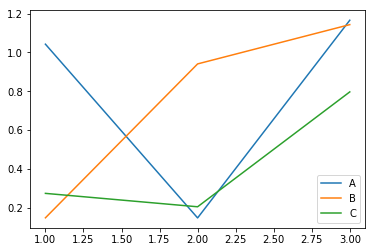

In [34]:
df2 = DataFrame(abs(randn(9)).reshape(3,3),index=[1,2,3],columns=list('ABC'))
print(df2)
plt.plot(df2)
plt.legend(df2.columns,loc="best")
plt.savefig('samplepic.png')
plt.show()